# Heart Disease Classification

# Prediction Heart Disease using Machine Learning

This notebook looks into using various python-based machine learning libraries in an attempt to build a machine learning model capable of predictiong whether or not someone has heart disease based on their medical attributes.

We're going to take the following approach:
1. Problem Definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## Preparing the tools
We're going to use Pandas, NumPy and Matplotlib for data analysis and muanipulation.

In [ ]:
# Import all the tools we need

# Regular EDA(Exploratory Data Analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# We want our plots to appear inside the notebook
%matplotlib inline

# Models from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

## Load Data

In [ ]:
df = pd.read_csv('heart-disease.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Data Exploration (exploratary data analysis or EDA)
The goal here is to find out more about the data and become a subject matter export on the dataset you're working with.

1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [ ]:
# Let's find out how many of each class there
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

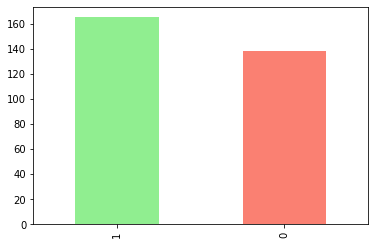

In [ ]:
df['target'].value_counts().plot(kind='bar', color=['lightgreen', 'salmon']);

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency according to Sex

In [ ]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [ ]:
# Compare target column with sex column
pd.crosstab(df.sex, df.target)

target,0,1
sex,,
0,24,72
1,114,93


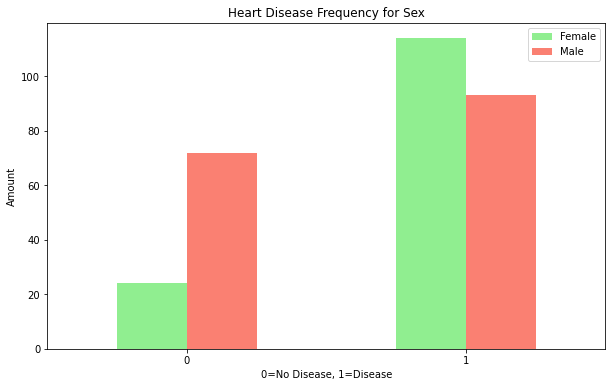

In [ ]:
# Create a plot of crosstab
pd.crosstab(df.sex, df.target).plot(kind='bar',
                                    figsize=(10,6),
                                    color=['lightgreen', 'salmon'])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('0=No Disease, 1=Disease')
plt.ylabel('Amount')
plt.legend(['Female', 'Male'])
plt.xticks(rotation=0);

### Age vs Max Heart Rate (tahlach) for Heart Disease

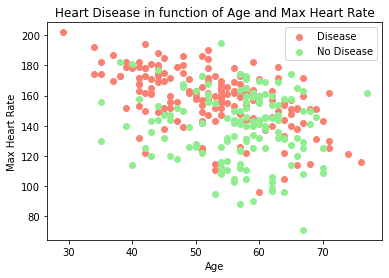

In [ ]:
# Create another figure

# Scatter with positive examples
plt.scatter(df.age[df.target == 1], df.thalach[df.target == 1], color='salmon')

# Scatter with negative examples
plt.scatter(df.age[df.target == 0], df.thalach[df.target == 0], color='lightgreen')

# Add some helpful info
plt.title('Heart Disease in function of Age and Max Heart Rate')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend(['Disease', 'No Disease']);

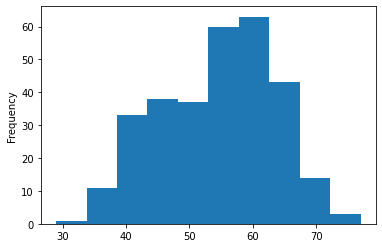

In [ ]:
# Check the distribution of the age column with a histogram
df.age.plot.hist();

## Heart Disease Frequency per Chest Pain Type

In [ ]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


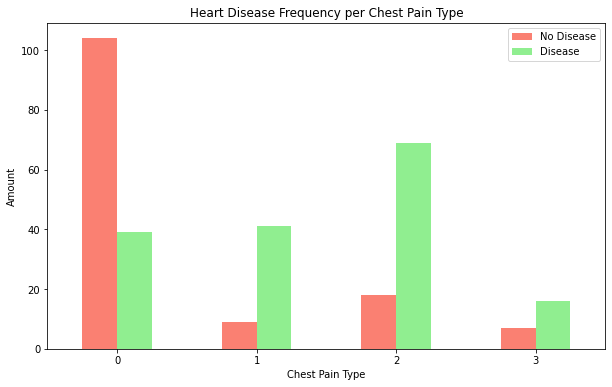

In [ ]:
# Make the crosstab more visual
pd.crosstab(df.cp, df.target).plot(kind='bar',
                                   figsize=(10,6),
                                   color=['salmon', 'lightgreen'])

# Add some communications
plt.title('Heart Disease Frequency per Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Amount')
plt.legend(['No Disease', 'Disease'])
plt.xticks(rotation=0);

In [ ]:
# Make a correlation
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


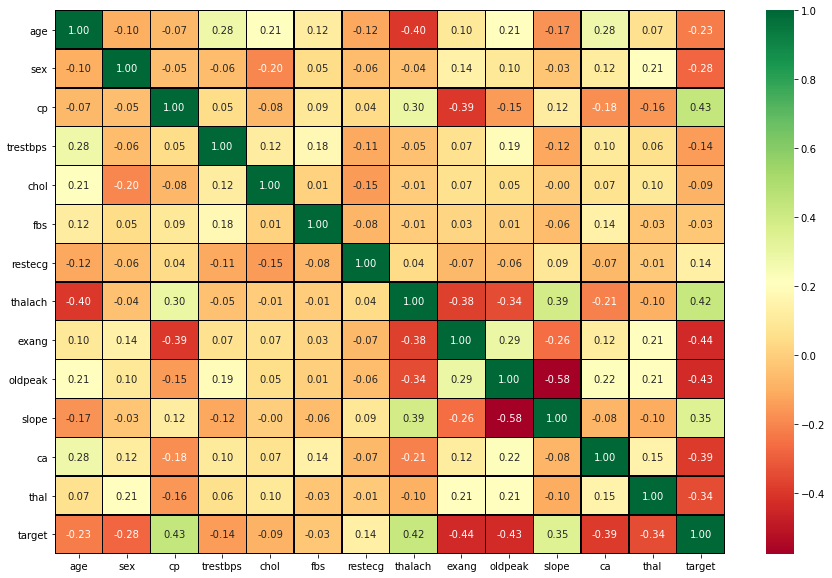

In [ ]:
# Let's make our correlation matrix a little prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                 annot=True, 
                 linewidths=0.3,
                 linecolor='Black',
                 fmt='.2f',
                 cmap='RdYlGn')

## Modelling

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# Split data into X and y
X = df.drop('target', axis=1)
y = df.target

In [ ]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [ ]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [ ]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
X_train, len(X_train)

(     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
 265   66    1   0       112   212    0        0      132      1      0.1   
 270   46    1   0       120   249    0        0      144      0      0.8   
 193   60    1   0       145   282    0        0      142      1      2.8   
 206   59    1   0       110   239    0        0      142      1      1.2   
 53    44    0   2       108   141    0        1      175      0      0.6   
 ..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
 51    66    1   0       120   302    0        0      151      0      0.4   
 185   44    1   0       112   290    0        0      153      0      0.0   
 197   67    1   0       125   254    1        1      163      0      0.2   
 171   48    1   1       110   229    0        1      168      0      1.0   
 79    58    1   2       105   240    0        0      154      1      0.6   
 
      slope  ca  thal  
 265      2   1     2  
 270      2   0     3  
 1

In [ ]:
X_test, len(X_test)

(     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
 1     37    1   2       130   250    0        1      187      0      3.5   
 104   50    1   2       129   196    0        1      163      0      0.0   
 264   54    1   0       110   206    0        0      108      1      0.0   
 232   55    1   0       160   289    0        0      145      1      0.8   
 276   58    1   0       146   218    0        1      105      0      2.0   
 ..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
 238   77    1   0       125   304    0        0      162      1      0.0   
 49    53    0   0       138   234    0        0      160      0      0.0   
 257   50    1   0       144   200    0        0      126      1      0.9   
 212   39    1   0       118   219    0        1      140      0      1.2   
 283   40    1   0       152   223    0        1      181      0      0.0   
 
      slope  ca  thal  
 1        0   0     2  
 104      2   0     2  
 2

Now we've got our data split into training and test sets, it's time to build a machine learning model.

We'll train it (find the patterns) on the training set.
We'll test it (use the patterns) on the test set.

We're goin gto try 3 different machine learning models:
1. Logistic Regression
2. K-Nearest Neighbors Classifier
3. Random Forest Classifier

In [ ]:
# Put models in a dictionary
models = {'Logistic Regression': LogisticRegression(),
          'KNN': KNeighborsClassifier(),
          'Random Forest Classifier': RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(model, X_train, X_test, y_train, y_test):
    """
    Fitsa and evaluates given machine learning models.
    models: a dictionary of different Scikit-Learn machine learning models
    X_train: training data (no labels)
    X_test: testing data (no labels)
    y_train: training labels
    y_test: testing labels
    """
    
    # Set random seed
    np.random.seed(42)
    
    # Make dictionary to keep model scores
    model_scores = {}
    
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data 
        model.fit(X_train, y_train)
        
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
        
    return model_scores

In [ ]:
model_scores = fit_and_score(models,
                             X_train,
                             X_test, 
                             y_train,
                             y_test)
model_scores

D:\Study\Machine_Learning_Models\Heart-Disease-Classification-Project-1\env\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8524590163934426,
 'KNN': 0.5409836065573771,
 'Random Forest Classifier': 0.819672131147541}

### Model Comparison

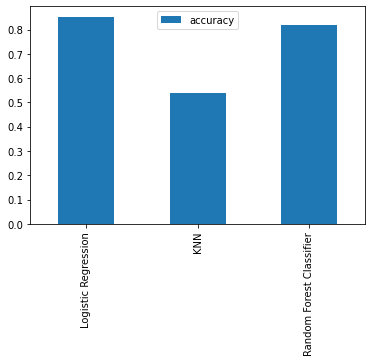

In [ ]:
model_compare = pd.DataFrame(model_scores,
                             index=['accuracy'])
model_compare.T.plot.bar();

Now we're got a baseline model... and we known a model's first prediction aren't always what we should based our next steps off. What should we do?
Let's look at the following:
* Hyperparameter tuning
* Feature importance
* Confusion matrix
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area Under the Curve (AUC)

### Hyperparameter Tuning (by hand)

In [ ]:
# Let's tune KNN
train_scores = []
test_scores = []

# Creates a list of different values for n_neighbors
neighbors = range(1, 21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training score list
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the testing score list
    test_scores.append(knn.score(X_test, y_test))

In [ ]:
train_scores

[1.0,
 0.8016528925619835,
 0.7892561983471075,
 0.78099173553719,
 0.78099173553719,
 0.78099173553719,
 0.7520661157024794,
 0.7355371900826446,
 0.743801652892562,
 0.7355371900826446,
 0.7231404958677686,
 0.71900826446281,
 0.7107438016528925,
 0.6694214876033058,
 0.6900826446280992,
 0.6942148760330579,
 0.7148760330578512,
 0.6983471074380165,
 0.6859504132231405,
 0.6983471074380165]

In [ ]:
test_scores

[0.47540983606557374,
 0.5245901639344263,
 0.5245901639344263,
 0.6065573770491803,
 0.5409836065573771,
 0.5737704918032787,
 0.5081967213114754,
 0.5245901639344263,
 0.4918032786885246,
 0.4918032786885246,
 0.47540983606557374,
 0.5409836065573771,
 0.5573770491803278,
 0.5737704918032787,
 0.5409836065573771,
 0.5245901639344263,
 0.5081967213114754,
 0.5409836065573771,
 0.5245901639344263,
 0.5409836065573771]

Maximum KNN score on the test data: 60.66%


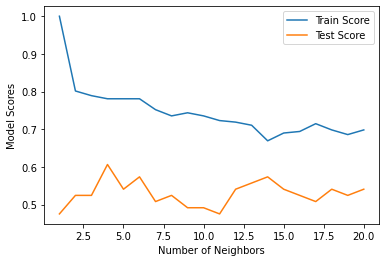

In [ ]:
plt.plot(neighbors, train_scores, label='Train Score')
plt.plot(neighbors, test_scores, label='Test Score')
plt.xlabel('Number of Neighbors')
plt.ylabel('Model Scores')
plt.legend()
print(f'Maximum KNN score on the test data: {max(test_scores) * 100:.2f}%')

## Hyperparameter Tuning with RandomizedSearchCV

We're going to tune:
* LogisticRegression()
* RandomForestClassifier()

...using RandomizedSearchCV

In [ ]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {'C': np.logspace(-4, 4, 20),
                'solver': ['liblinear']}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {'n_estimators': np.arange(10, 1000, 50),
           'max_depth': [None, 3, 5, 10],
           'min_samples_split': np.arange(2, 20, 2),
           'min_samples_leaf': np.arange(1, 20, 2)}

Now we've got hyperparameter grids setup for each of our models, let's tune them using RandomizedSearchCV

In [ ]:
# Tune LogisticRegression
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                n_iter=20, 
                                cv=5,
                                verbose=True)

# Fit the hyperparameters search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [ ]:
# Find the best parameters
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [ ]:
# Evaluate Randomized search LogisticRegression model
rs_log_reg.score(X_test, y_test)

0.8524590163934426

Now we've tuned LogisticRegression(), let's do the same for RandomForestClassifier()

In [ ]:
# Set random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           rf_grid, 
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [ ]:
# Find the best parameters
rs_rf.best_params_

{'n_estimators': 310,
 'min_samples_split': 2,
 'min_samples_leaf': 19,
 'max_depth': 5}

In [ ]:
# Evaluate Randomized search RandomForestClassifier model
rs_rf.score(X_test, y_test)

0.819672131147541

# Hyperparameter Tuning with GridSearchCV

Since our LinearRegression model provides the best score so far, we'll try and improve them again using GridSearchCV

In [ ]:
# Different hyperparameters for our LogisticRegressin model
log_reg_grid = {'C': np.logspace(-4, 4, 30),
                'solver': ['liblinear']}

# Setup  grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [ ]:
# Check the best hyperparameters
gs_log_reg.best_params_

{'C': 0.38566204211634725, 'solver': 'liblinear'}

In [ ]:
# Evaluate the grid search LogisticRegression
gs_log_reg.score(X_test, y_test)

0.8524590163934426

## Evaluating our tuned machine learning classifier, beyond accuracy

* ROC curve and AUC score
* Confusion Matrix
* Classificationn Report
* Precision
* Recall
* F1-score

...and it would be great if cross-validation was used where possible

To make comparisons and evaluate our trained model, first we need to make predictions.

In [ ]:
# Make predictions with our tuned model
y_preds = gs_log_reg.predict(X_test)

In [ ]:
y_preds

array([1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1], dtype=int64)

In [ ]:
np.array(y_test)

array([1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

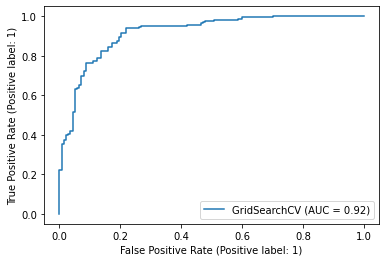

In [ ]:
# Plot ROC curve and calculate AUC score
plot_roc_curve(gs_log_reg, X, y);

In [ ]:
# Confusion Matrix
print(confusion_matrix(y_test, y_preds))

[[30  7]
 [ 2 22]]


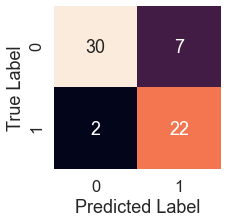

In [ ]:
# Visualizing the confusion matrix
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     cbar=False,
                     annot=True)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    
plot_conf_mat(y_test, y_preds)

Now we've got a ROC curve, an AUC score and confusion matrix, ler's get a classification report as well as cross-validated precision, recall and f1-score

In [ ]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.94      0.81      0.87        37
           1       0.76      0.92      0.83        24

    accuracy                           0.85        61
   macro avg       0.85      0.86      0.85        61
weighted avg       0.87      0.85      0.85        61



### Calculate evaluation metrics using cross-validation

We're going to calculate accuracy, precision, recall and f1-score of our model using cross-validation and to do so we'll be using cross_val_score()

In [ ]:
# Check best hyperparameters
gs_log_reg.best_params_

NameError: ignored

In [ ]:
# Creates a new classifier with best hyperparameters
clf = LogisticRegression(C=0.38566204211634725, solver='liblinear')

In [ ]:
# Cross validated accuracy (by default)
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring='accuracy')
cv_acc = np.mean(cv_acc)
cv_acc

In [ ]:
# Cross validated precision
cv_precision = cross_val_score(clf,
                               X,
                               y, 
                               cv=5,
                               scoring='precision')
cv_precision = np.mean(cv_precision)
cv_precision

In [ ]:
# Cross validated recall
cv_recall = cross_val_score(clf,
                            X,
                            y,
                            cv=5,
                            scoring='recall')
cv_recall = np.mean(cv_recall)
cv_recall

In [ ]:
# Cross validated f1-score
f1 = cross_val_score(clf,
                     X, 
                     y,
                     cv=5,
                     scoring='f1')
f1 = np.mean(f1)
f1

In [ ]:
# Visualizing cross-validated metrics
cv_metrics = pd.DataFrame({'Accuracy': cv_acc,
                           'Precision': cv_precision,
                           'Recall': cv_recall,
                           'F1': f1},
                          index=[0])

cv_metrics.T.plot.bar(title='Cross-validated Classification Metrics', legend=False)
plt.xticks(rotation=0);

### Feature Importance
Feature importance is another is different for each machine learning model. One way to find feature importance is to search for "(MODEL NAME) feature importance."

Let's find the feature importance for our LogisticRegression model...

In [ ]:
# Fit an instance of LogisticRegression
clf = LogisticRegression(C=0.38566204211634725, solver='liblinear').fit(X_train, y_train);

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# Check coef_
clf.coef_

array([[ 0.01140999, -1.02357522,  0.66933945, -0.01622813, -0.00405459,
         0.05812503,  0.4557508 ,  0.03365777, -0.48777364, -0.43316083,
         0.35357849, -0.66103191, -0.90485746]])

In [ ]:
# Make coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.011409985872764344,
 'sex': -1.0235752236746445,
 'cp': 0.6693394499053882,
 'trestbps': -0.016228129985800765,
 'chol': -0.004054592002425396,
 'fbs': 0.05812503051208971,
 'restecg': 0.45575079758259535,
 'thalach': 0.03365777334297592,
 'exang': -0.48777364062407863,
 'oldpeak': -0.43316083353911167,
 'slope': 0.3535784881666154,
 'ca': -0.6610319137870455,
 'thal': -0.9048574572196404}

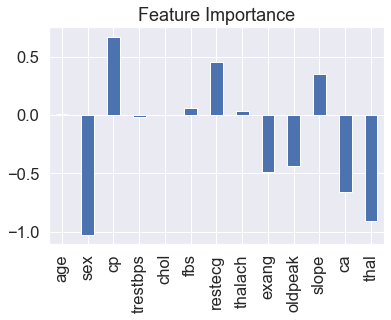

In [ ]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title='Feature Importance', legend=False);

In [ ]:
pd.crosstab(df.slope, df.target)

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


In [ ]:
pd.crosstab(df.sex, df.target)

target,0,1
sex,,
0,24,72
1,114,93


In [ ]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


## 6. Experimentation

If we haven't hit the evaluation mertric yet... ask yourself...

* Could we collect more data?
* Could we try a better model? Like CatBoost or XGBoost?
* Could we impove the current models? (Beyond what we've done so far)
* If our model is good enough (we have hit evaluation metric) how would we export it and share it with others?